In [ ]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing, linear_model
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
data = pd.read_csv("CarPrice_Assignment.csv")

In [ ]:
data.head().T

,0,1,2,3,4
car_ID,1,2,3,4,5
symboling,3,3,1,2,2
CarName,alfa-romero giulia,alfa-romero stelvio,alfa-romero Quadrifoglio,audi 100 ls,audi 100ls
fueltype,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
doornumber,two,two,two,four,four
carbody,convertible,convertible,hatchback,sedan,sedan
drivewheel,rwd,rwd,rwd,fwd,4wd
enginelocation,front,front,front,front,front
wheelbase,88.6,88.6,94.5,99.8,99.4


In [ ]:
data.shape

(205, 26)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

- We can see that there are no null-value in our dataset

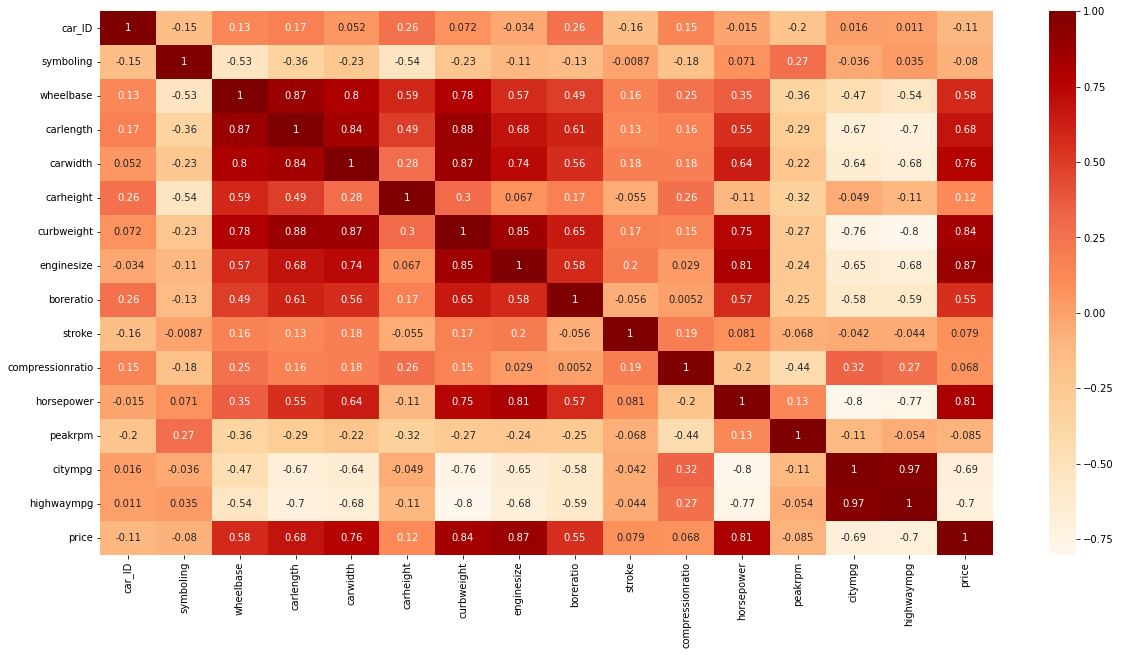

In [ ]:
ax = plt.subplots(figsize=(20,10))
ax = sns.heatmap(data.corr() , annot = True , cbar = True, cmap='OrRd')

- We will be dropping the carID and car name columns because they are not important

In [ ]:
df = data.drop(["car_ID","CarName"], axis=1)

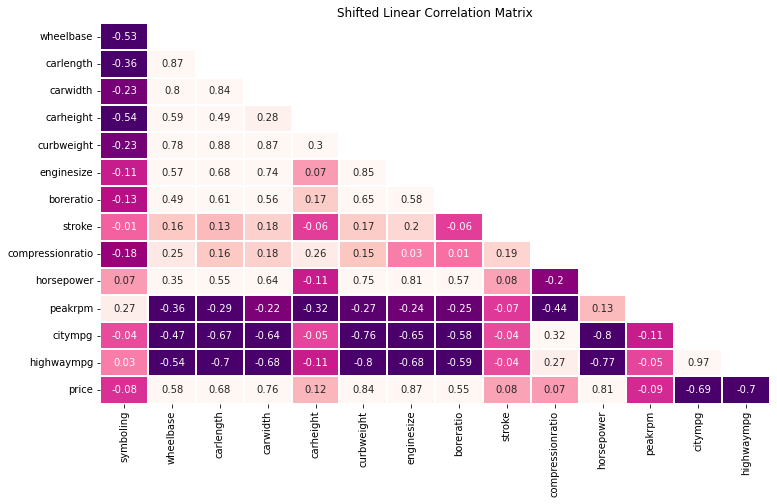

In [ ]:
def corrMat(df,id=False):
    
    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(12,7))
    mask = np.triu(np.ones_like(corr_mat, dtype=bool))
    mask = mask[1:,:-1] ## mask the upper triangle of the corr_mat so that it will only show the lower triangle
    corr = corr_mat.iloc[1:,:-1].copy()
    sns.heatmap(corr,mask=mask,vmin=-0.3,vmax=0.3,center=0, 
                cmap='OrRd',square=False,lw=2,annot=True,cbar=False)
    ax.set_title('Shifted Linear Correlation Matrix')
    
corrMat(df)

In [ ]:
def LABEL_ENCODING(x):
    label_encoder = preprocessing.LabelEncoder()
    df[x]= label_encoder.fit_transform(df[x])
    df[x].unique()

In [ ]:
cat = ["fueltype", "aspiration", "doornumber", "carbody", "drivewheel",
            "enginelocation", "enginetype", "cylindernumber", "fuelsystem"]
for i in cat:
    LABEL_ENCODING(i)
df.head().T

,0,1,2,3,4
symboling,3.00,3.00,1.00,2.00,2.00
fueltype,1.00,1.00,1.00,1.00,1.00
aspiration,0.00,0.00,0.00,0.00,0.00
doornumber,1.00,1.00,1.00,0.00,0.00
carbody,0.00,0.00,2.00,3.00,3.00
drivewheel,2.00,2.00,2.00,1.00,0.00
enginelocation,0.00,0.00,0.00,0.00,0.00
wheelbase,88.60,88.60,94.50,99.80,99.40
carlength,168.80,168.80,171.20,176.60,176.60
carwidth,64.10,64.10,65.50,66.20,66.40


#### Feature Scaling

In [ ]:
scaler = StandardScaler()
drop = cat.copy()
drop.append('price')
x_num = df.drop(drop,axis = 1)
x_cat = df[cat]
x_scaled = scaler.fit_transform(x_num)

In [ ]:
x_scaled= pd.DataFrame(data=x_scaled,columns = df.drop(drop,axis = 1).columns)
X = pd.concat([x_scaled, x_cat],axis=1)
Y = df["price"]

In [ ]:
X.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,highwaympg,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,...,0.034606,0.194311,-0.059866,0.664073,-0.596135,-0.041671,0.212471,0.050372,0.197762,0.091163
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,...,-0.544082,-0.308346,0.257611,-0.447357,0.401362,0.459745,-0.187790,-0.135577,-0.184596,0.384601
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,...,-0.704662,-0.212679,0.234539,-0.398568,0.334433,0.485649,-0.050989,-0.113291,-0.109585,0.557810
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,...,-0.677218,-0.233880,0.300567,-0.207168,0.131710,0.470751,-0.051698,0.012298,-0.194074,0.521434
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,...,-0.107358,-0.284631,0.087311,-0.552208,0.568534,-0.019719,-0.106234,-0.127002,-0.283845,0.017046
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,...,-0.797465,-0.217275,0.324902,-0.197379,0.128467,0.575111,0.050468,-0.055265,-0.047127,0.611642
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,...,-0.677470,-0.069594,0.108217,-0.020742,-0.073352,0.524307,0.196826,0.040766,-0.085613,0.514070
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,...,-0.587012,-0.054451,0.212614,-0.119258,0.010549,0.481827,0.185042,0.029355,-0.032844,0.475599
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,...,-0.043931,-0.241829,0.222982,0.011082,-0.015325,0.071591,-0.138455,-0.141918,-0.050088,0.088153
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,...,0.265201,-0.984356,0.295541,-0.177888,0.136243,0.127479,-0.019762,-0.071873,-0.064701,-0.100786


In [ ]:
vif_data = X
## calculating VIF for every column
VIF = pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF

symboling            2.818471
wheelbase           10.805103
carlength           11.449916
carwidth             8.885879
carheight            3.062249
curbweight          18.712448
enginesize          13.715323
boreratio            2.292957
stroke               1.421132
compressionratio    11.113537
horsepower          14.562256
peakrpm              2.553746
citympg             31.985317
highwaympg          28.211522
fueltype            73.191360
aspiration           2.886006
doornumber           4.981780
carbody             27.218810
drivewheel          17.134941
enginelocation       1.746074
enginetype          14.674260
cylindernumber      17.668389
fuelsystem           8.481000
dtype: float64

- Handling Multicollinearity

In [ ]:
def MC_remover(data):
    vif=pd.Series([variance_inflation_factor(data.values,i)for i in range(data.shape[1])],index=data.columns)
    if vif.max()>5:
        print(vif[vif == vif.max()].index[0],'has been removed')
        data = data.drop(columns=[vif[vif==vif.max()].index[0]])
        return data
    else:
        print("No multicollinearity present anymore")
        return data

In [ ]:
for i in range(10):
    vif_data=MC_remover(vif_data)
vif_data.head()

fueltype has been removed
citympg has been removed
curbweight has been removed
cylindernumber has been removed
carbody has been removed
horsepower has been removed
carlength has been removed
drivewheel has been removed
wheelbase has been removed
No multicollinearity present anymore


,symboling,carwidth,carheight,enginesize,boreratio,stroke,compressionratio,peakrpm,highwaympg,aspiration,doornumber,enginelocation,enginetype,fuelsystem
0,1.743470,-0.844782,-2.020417,0.074449,0.519071,-1.839377,-0.288349,-0.262960,-0.546059,0,1,0,0,5
1,1.743470,-0.844782,-2.020417,0.074449,0.519071,-1.839377,-0.288349,-0.262960,-0.546059,0,1,0,0,5
2,0.133509,-0.190566,-0.543527,0.604046,-2.404880,0.685946,-0.288349,-0.262960,-0.691627,0,1,0,5,5
3,0.938490,0.136542,0.235942,-0.431076,-0.517266,0.462183,-0.035973,0.787855,-0.109354,0,0,0,3,5
4,0.938490,0.230001,0.235942,0.218885,-0.517266,0.462183,-0.540725,0.787855,-1.273900,0,0,0,3,5


In [ ]:
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF,len(vif_data.columns)

(symboling           2.057275
 carwidth            3.823826
 carheight           1.783746
 enginesize          4.137696
 boreratio           2.044491
 stroke              1.264247
 compressionratio    1.943406
 peakrpm             1.839266
 highwaympg          3.887783
 aspiration          1.859788
 doornumber          3.325423
 enginelocation      1.482474
 enginetype          4.114732
 fuelsystem          4.326486
 dtype: float64,
 14)

#### Feature Selection

In [ ]:
X = vif_data
Y = df['price']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=44)

In [ ]:
reg=LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [ ]:
reg.score(X_train,Y_train)

0.8480165985029022

In [ ]:
reg.score(X_test , Y_test)

0.8799825118382355

In [ ]:
pred = reg.predict(X_test)

In [ ]:
r2 = r2_score(Y_test , pred)
r2

0.8799825118382355

In [ ]:
model = linear_model.Lasso(alpha=0.1)
model.fit(X_train , Y_train)

Lasso(alpha=0.1)

In [ ]:
model.score(X_train,Y_train)

0.8480165776822014

In [ ]:
model.score(X_test,Y_test)

0.8800026856847671

In [ ]:
lpred = model.predict(X_test)

In [ ]:
r = r2_score(Y_test , lpred)
r

0.8800026856847671

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# default setting
rfr = RandomForestRegressor(random_state = 42)
rfr.fit(X_train , Y_train)
rfr.score(X_train,Y_train)

0.9796118421409398

In [ ]:
rfr.score(X_test,Y_test)

0.9257631220432583

In [ ]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

#### Random Hyperparameter Grid

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train , Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.9s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.9s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.9s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   2.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   2.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   2.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('Score = {:0.2f}%.'.format(model.score(test_features, test_labels)))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
base_model.fit(X_train , Y_train)
base_accuracy = evaluate(base_model, X_test , Y_test)

Model Performance
Average Error: 1750.4156 degrees.
Accuracy = 87.33%.
Score = 0.93%.


In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test , Y_test)

Model Performance
Average Error: 1558.6516 degrees.
Accuracy = 88.53%.
Score = 0.94%.


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 1.37%.


#### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [80, 90, 100],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [2,4],
    'n_estimators': [400, 500, 1000]
}

# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train , Y_train)
grid_search.best_params_

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.9s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.9s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.9s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.0s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.0s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.0s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=400

{'bootstrap': False,
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test , Y_test)

Model Performance
Average Error: 1560.8693 degrees.
Accuracy = 88.54%.
Score = 0.94%.
